
🔧 Config 1: {'hidden_layer_sizes': (6,), 'activation': 'relu', 'learning_rate_init': 0.01, 'max_iter': 400, 'early_stopping': False}
Iteration 1, loss = 0.76441309
Iteration 2, loss = 0.67814065
Iteration 3, loss = 0.61357385
Iteration 4, loss = 0.55993139
Iteration 5, loss = 0.51459306
Iteration 6, loss = 0.47513291
Iteration 7, loss = 0.44118538
Iteration 8, loss = 0.40857920
Iteration 9, loss = 0.38215235
Iteration 10, loss = 0.35992912
Iteration 11, loss = 0.34055493
Iteration 12, loss = 0.32531725
Iteration 13, loss = 0.31382546
Iteration 14, loss = 0.30143247
Iteration 15, loss = 0.29126603
Iteration 16, loss = 0.28186533
Iteration 17, loss = 0.27325817
Iteration 18, loss = 0.26550216
Iteration 19, loss = 0.25790007
Iteration 20, loss = 0.25038547
Iteration 21, loss = 0.24402582
Iteration 22, loss = 0.23780820
Iteration 23, loss = 0.23158510
Iteration 24, loss = 0.22554264
Iteration 25, loss = 0.21951264
Iteration 26, loss = 0.21362863
Iteration 27, loss = 0.20819163
Iteration 2

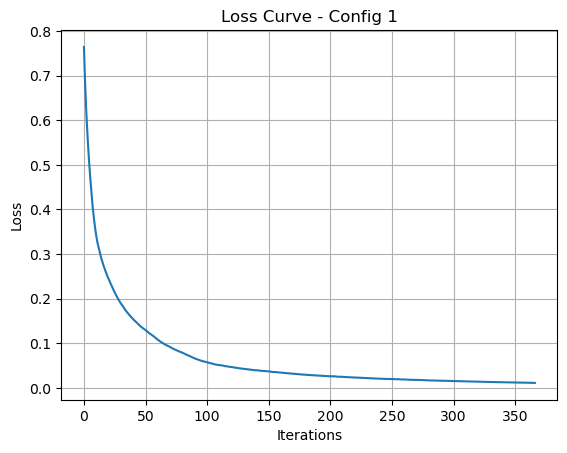

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("ionosphere.csv", header=None)
df.columns = [f"feature_{i}" for i in range(df.shape[1] - 1)] + ["target"]

# Encode target labels
le = LabelEncoder()
df["target"] = le.fit_transform(df["target"])  # 'g' -> 1, 'b' -> 0

# Split data
X = df.drop("target", axis=1).values
y = df["target"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# List of configs to try
configs = [
   
    #{"hidden_layer_sizes": (2,), "activation": "relu", "learning_rate_init": 0.001, "max_iter": 1200,"early_stopping": False},
    #{"hidden_layer_sizes": (2,), "activation": "relu", "learning_rate_init": 0.01, "max_iter": 600, "early_stopping": False},
    #{"hidden_layer_sizes": (3,), "activation": "relu", "learning_rate_init": 0.001, "max_iter": 800,  "early_stopping": False},
    #{"hidden_layer_sizes": (3,), "activation": "relu", "learning_rate_init": 0.01, "max_iter": 500,  "early_stopping": False},
    #{"hidden_layer_sizes": (3,), "activation": "relu", "learning_rate_init": 0.01, "max_iter": 50,  "early_stopping": True},
    {"hidden_layer_sizes": (4,), "activation": "relu", "learning_rate_init": 0.001, "max_iter": 900,  "early_stopping": False},
    #{"hidden_layer_sizes": (4,), "activation": "relu", "learning_rate_init": 0.01, "max_iter": 400,  "early_stopping": False},
    #{"hidden_layer_sizes": (5,), "activation": "relu", "learning_rate_init": 0.001, "max_iter": 800,  "early_stopping": False},
    #{"hidden_layer_sizes": (5,), "activation": "relu", "learning_rate_init": 0.01, "max_iter": 350,  "early_stopping": False},
    #{"hidden_layer_sizes": (6,), "activation": "relu", "learning_rate_init": 0.001, "max_iter": 900,  "early_stopping": False},
    #{"hidden_layer_sizes": (6,), "activation": "relu", "learning_rate_init": 0.01, "max_iter": 400,  "early_stopping": False},




]

# Train and evaluate for each config
for idx, config in enumerate(configs):
    print(f"\n Config {idx+1}: {config}")
    clf = MLPClassifier(**config, solver="adam", random_state=42,verbose=True)
    clf.fit(X_train, y_train)
   

    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f" Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    # Plot loss curve
    plt.plot(clf.loss_curve_)
    plt.title(f"Loss Curve - Config {idx+1}")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.show()
